Found 45 images belonging to 3 classes.
Found 45 images belonging to 3 classes.
Epoch 1/200
1500/1500 [==============================] - 39s 26ms/step - loss: 0.1772 - acc: 0.9238 - val_loss: 1.6050e-05 - val_acc: 1.0000
Epoch 2/200
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0359 - acc: 0.9887 - val_loss: 1.3716e-04 - val_acc: 1.0000
Epoch 3/200
1500/1500 [==============================] - 35s 24ms/step - loss: 0.0239 - acc: 0.9922 - val_loss: 2.7339e-06 - val_acc: 1.0000
Epoch 4/200
1500/1500 [==============================] - 37s 24ms/step - loss: 0.0306 - acc: 0.9911 - val_loss: 4.5300e-07 - val_acc: 1.0000
Epoch 5/200
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0196 - acc: 0.9933 - val_loss: 3.1318e-05 - val_acc: 1.0000
Epoch 6/200
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0158 - acc: 0.9947 - val_loss: 1.3908e-07 - val_acc: 1.0000
Epoch 7/200
1500/1500 [==============================] - 40s 27ms/step - l

1500/1500 [==============================] - 34s 22ms/step - loss: 0.0072 - acc: 0.9996 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 116/200
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0256 - acc: 0.9976 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 117/200
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0345 - acc: 0.9978 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 118/200
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0205 - acc: 0.9982 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 119/200
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0107 - acc: 0.9993 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 120/200
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0180 - acc: 0.9987 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 121/200
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0251 - acc: 0.9984 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 122/200

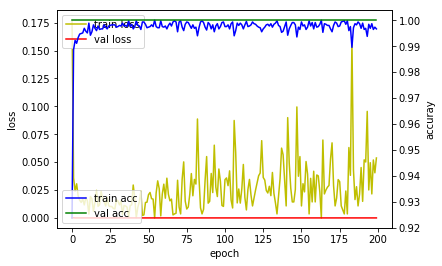

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import keras

# 랜덤시드 고정시키기
np.random.seed(3)

from keras.preprocessing.image import ImageDataGenerator

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'handwriting_shape/train',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
tb_hist= keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
hist = model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=200,
        validation_data=test_generator,
        validation_steps=5,
        callbacks=[tb_hist])

# 모델 평가하기
print("-- Evaluate --")

scores = model.evaluate_generator(
            test_generator, 
            steps = 5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 모델 예측하기
print("-- Predict --")

output = model.predict_generator(
            test_generator, 
            steps = 5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(test_generator.index_array)
print(output)
print(test_generator.filenames)

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import keras

# 랜덤시드 고정시키기
np.random.seed(3)

from keras.preprocessing.image import ImageDataGenerator

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'handwriting_shape/train',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
tb_hist= keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)

hist = model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=200,
        validation_data=test_generator,
        validation_steps=5,
        callbacks=[tb_hist])

# 모델 평가하기
print("-- Evaluate --")

scores = model.evaluate_generator(
            test_generator, 
            steps = 5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 모델 예측하기
print("-- Predict --")

output = model.predict_generator(
            test_generator, 
            steps = 5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(test_generator.index_array)
print(test_generator.filenames)
print(output)

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

Using TensorFlow backend.


Found 345 images belonging to 3 classes.
Found 345 images belonging to 3 classes.
Epoch 1/200
1500/1500 [==============================] - 35s 23ms/step - loss: 0.6843 - acc: 0.6938 - val_loss: 0.0898 - val_acc: 1.0000
Epoch 2/200
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2808 - acc: 0.8922 - val_loss: 0.0645 - val_acc: 0.9333
Epoch 3/200
1500/1500 [==============================] - 35s 23ms/step - loss: 0.1905 - acc: 0.9380 - val_loss: 0.2046 - val_acc: 0.9333
Epoch 4/200
1500/1500 [==============================] - 35s 23ms/step - loss: 0.1487 - acc: 0.9480 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 5/200
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1133 - acc: 0.9571 - val_loss: 9.8887e-04 - val_acc: 1.0000oss: 0.1116 - acc: 0.95 - ETA: 0s - loss: 0.1112
Epoch 6/200
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0891 - acc: 0.9689 - val_loss: 1.3751e-04 - val_acc: 1.0000
Epoch 7/200
1500/1500 [=================

1500/1500 [==============================] - 32s 21ms/step - loss: 0.0297 - acc: 0.9922 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 58/200
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0305 - acc: 0.9902 - val_loss: 1.5288e-05 - val_acc: 1.0000
Epoch 59/200
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0347 - acc: 0.9900 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 60/200
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0276 - acc: 0.9924 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 61/200
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0277 - acc: 0.9916 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 62/200
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0244 - acc: 0.9922 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 63/200
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0372 - acc: 0.9907 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 64/200
1500/1

1500/1500 [==============================] - 42s 28ms/step - loss: 0.0240 - acc: 0.9929 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 115/200
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0200 - acc: 0.9942 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 116/200
1500/1500 [==============================] - 31s 20ms/step - loss: 0.0438 - acc: 0.9907 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 117/200
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0164 - acc: 0.9956 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 118/200
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0260 - acc: 0.9947 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 119/200
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0207 - acc: 0.9942 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 120/200
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0147 - acc: 0.9958 - val_loss: 1.6689e-07 - val_acc: 1.0000
Epoch 121/200

1500/1500 [==============================] - 32s 21ms/step - loss: 0.0226 - acc: 0.9949 - val_loss: 1.2716e-07 - val_acc: 1.0000
Epoch 172/200
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0335 - acc: 0.9936 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 173/200
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0393 - acc: 0.9944 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 174/200
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0351 - acc: 0.9927 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 175/200
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0254 - acc: 0.9956 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 176/200
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0332 - acc: 0.9929 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 177/200
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0218 - acc: 0.9949 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 178/200

<Figure size 640x480 with 2 Axes>